# Supervised Learning Project: Predicting Stock Prices

## Introduction

### Problem Statement
The goal of this project is to **predict stock prices** based on historical data, including features like Open, High, Low, Close, and Volume. By doing so, we can provide investors with insights into future stock trends for companies like **Apple (AAPL)**, **Amazon (AMZN)**, **Microsoft (MSFT)**, **Google (GOOGL)**, and others. The problem here is a **regression problem**, as we are predicting continuous values (future stock prices).

### Project Objectives
The main objectives of this project are:
1. **Predict stock prices** for the companies listed above.
2. Build and evaluate a **supervised learning model** using the given historical stock data.
3. Identify the best-performing machine learning model (out of at least four different models).
4. Provide actionable insights based on feature importance analysis and model evaluation.

### Datasets (Supervised Learning)
For supervised learning, the dataset consists of historical stock data, which contains the following columns:
- **Date**: The date of the stock data.
- **Open**: The opening price of the stock for that day.
- **High**: The highest price the stock reached that day.
- **Low**: The lowest price the stock reached that day.
- **Close**: The closing price of the stock for that day (target variable)
- **Volume**: The number of shares traded.

---

##  Data Preprocessing

In [1]:
# Importing all the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the data

df = pd.read_csv("combined_stock_data.csv")

In [3]:
df.shape

(45939, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45939 entries, 0 to 45938
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     45939 non-null  object 
 1   open     45868 non-null  float64
 2   high     45838 non-null  float64
 3   low      45730 non-null  float64
 4   close    45902 non-null  float64
 5   volume   45939 non-null  int64  
 6   company  45939 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 2.5+ MB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,45868.0,5.948780e+01,1.396868e+02,0.00791,1.794050e+00,1.799050e+01,4.206000e+01,1.126100e+03
high,45838.0,6.013682e+01,1.406965e+02,0.00791,1.828000e+00,1.825800e+01,4.274750e+01,1.135540e+03
low,45730.0,5.885442e+01,1.385767e+02,0.00791,1.761100e+00,1.776400e+01,4.161775e+01,1.124060e+03
close,45902.0,5.946708e+01,1.396395e+02,0.00791,1.794500e+00,1.800050e+01,4.213600e+01,1.132880e+03
volume,45939.0,5.211639e+07,6.480794e+07,0.00000,9.075010e+06,3.229536e+07,7.337437e+07,2.069770e+09


In [6]:
df['company'].value_counts()

company
INTEL         11556
APPLE          8364
MICROSOFT      7983
AMAZON         5153
NVIDIA         4733
SALESFORCE     3201
TESLA          1858
FACEBOOK       1381
ALPHABET        916
ALIBABA         794
Name: count, dtype: int64

### Handling Missing Values 

### 🧹 Handling Missing Values

To ensure data quality and avoid bias in our predictive models, we handle missing values using appropriate imputation strategies:

- **Numerical Columns** (`open`, `high`, `low`, `close`): We impute using the **mean** of each column to preserve the distribution and prevent distortion in statistical properties.
  
- **Categorical Columns** (`company`): If missing values were present, we would impute using the **mode** (most frequent value). However, in our case, the `company` column has no missing values, so no imputation is necessary.


In [7]:
# Checking for missing values

df.isna().sum()

date         0
open        71
high       101
low        209
close       37
volume       0
company      0
dtype: int64

In [8]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'company'], dtype='object')

In [9]:
## Impute using the mean

In [10]:
# Impute 'open' with mean
df['open'] = df['open'].fillna(df['open'].mean())

# Impute 'close' with mean
df['close'] = df['close'].fillna(df['close'].mean())

In [11]:
df.isna().sum()

date         0
open         0
high       101
low        209
close        0
volume       0
company      0
dtype: int64

In [12]:
from sklearn.linear_model import LinearRegression

# Impute 'high' using regression
high_train = df.dropna(subset=['high', 'open', 'close', 'volume'])
high_missing = df[df['high'].isna()]

reg_high = LinearRegression()
reg_high.fit(high_train[['open', 'close', 'volume']], high_train['high'])
df.loc[high_missing.index, 'high'] = reg_high.predict(high_missing[['open', 'close', 'volume']])

# Impute 'low' using regression
low_train = df.dropna(subset=['low', 'open', 'close', 'volume'])
low_missing = df[df['low'].isna()]

reg_low = LinearRegression()
reg_low.fit(low_train[['open', 'close', 'volume']], low_train['low'])
df.loc[low_missing.index, 'low'] = reg_low.predict(low_missing[['open', 'close', 'volume']])

In [13]:
df.isna().sum()

date       0
open       0
high       0
low        0
close      0
volume     0
company    0
dtype: int64

In [14]:
# Verify no missing values remain
print(df.isnull().sum())

date       0
open       0
high       0
low        0
close      0
volume     0
company    0
dtype: int64


In [16]:
df.head()

,date,open,high,low,close,volume,company
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,APPLE
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,APPLE
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,APPLE
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,APPLE
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,APPLE


### Exploratory Data Analysis

In [17]:
df.head(10)

,date,open,high,low,close,volume,company
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,APPLE
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,APPLE
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,APPLE
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,APPLE
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,APPLE
5,1984-09-14,0.44052,0.45589,0.44052,0.44566,68847968,APPLE
6,1984-09-17,0.45718,0.46357,0.45718,0.45718,53755262,APPLE
7,1984-09-18,0.45718,0.46103,0.44052,0.44052,27136886,APPLE
8,1984-09-19,0.44052,0.44566,0.43157,0.43157,29641922,APPLE
9,1984-09-20,0.43286,0.43668,0.43286,0.43286,18453585,APPLE


In [15]:
# Set plot style
plt.style.use('seaborn-v0_8')

# Set up subplots for open and close
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)

# Plot Open price
sns.lineplot(x=df['date'], y=df['open'], ax=axes[0], color='#1f77b4')
axes[0].set_title('Open Price Over Time', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('Open Price', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot Close price
sns.lineplot(x=df['date'], y=df['close'], ax=axes[1], color='#d62728')
axes[1].set_title('Close Price Over Time', fontsize=14)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Close Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001BE5D88DC60> (for post_execute), with arguments args (),kwargs {}:



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001BE60AA6B60> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
# Apply seaborn style
plt.style.use('seaborn-v0_8')

# Create 2-column subplots for High and Low prices
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), sharex=True)

# Plot High price
sns.lineplot(x=df['date'], y=df['high'], ax=axes[0], color='#ff7f0e')
axes[0].set_title('High Price Over Time', fontsize=14)
axes[0].set_xlabel('Date', fontsize=12)
axes[0].set_ylabel('High Price', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(True)

# Plot Low price
sns.lineplot(x=df['date'], y=df['low'], ax=axes[1], color='#2ca02c')
axes[1].set_title('Low Price Over Time', fontsize=14)
axes[1].set_xlabel('Date', fontsize=12)
axes[1].set_ylabel('Low Price', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True)

# Adjust spacing
plt.tight_layout()
plt.show()

In [ ]:
plt.style.use('seaborn-v0_8')

# Create the figure
plt.figure(figsize=(16, 6))

# Bar plot for volume
sns.barplot(x=df['date'], y=df['volume'], color='#9467bd')

# Formatting
plt.title('Daily Trading Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume', fontsize=12)

plt.grid(True, linestyle='--', alpha=0.6)

# Improve layout
plt.tight_layout()
plt.show()

# Outliers

<Figure size 1400x800 with 0 Axes>

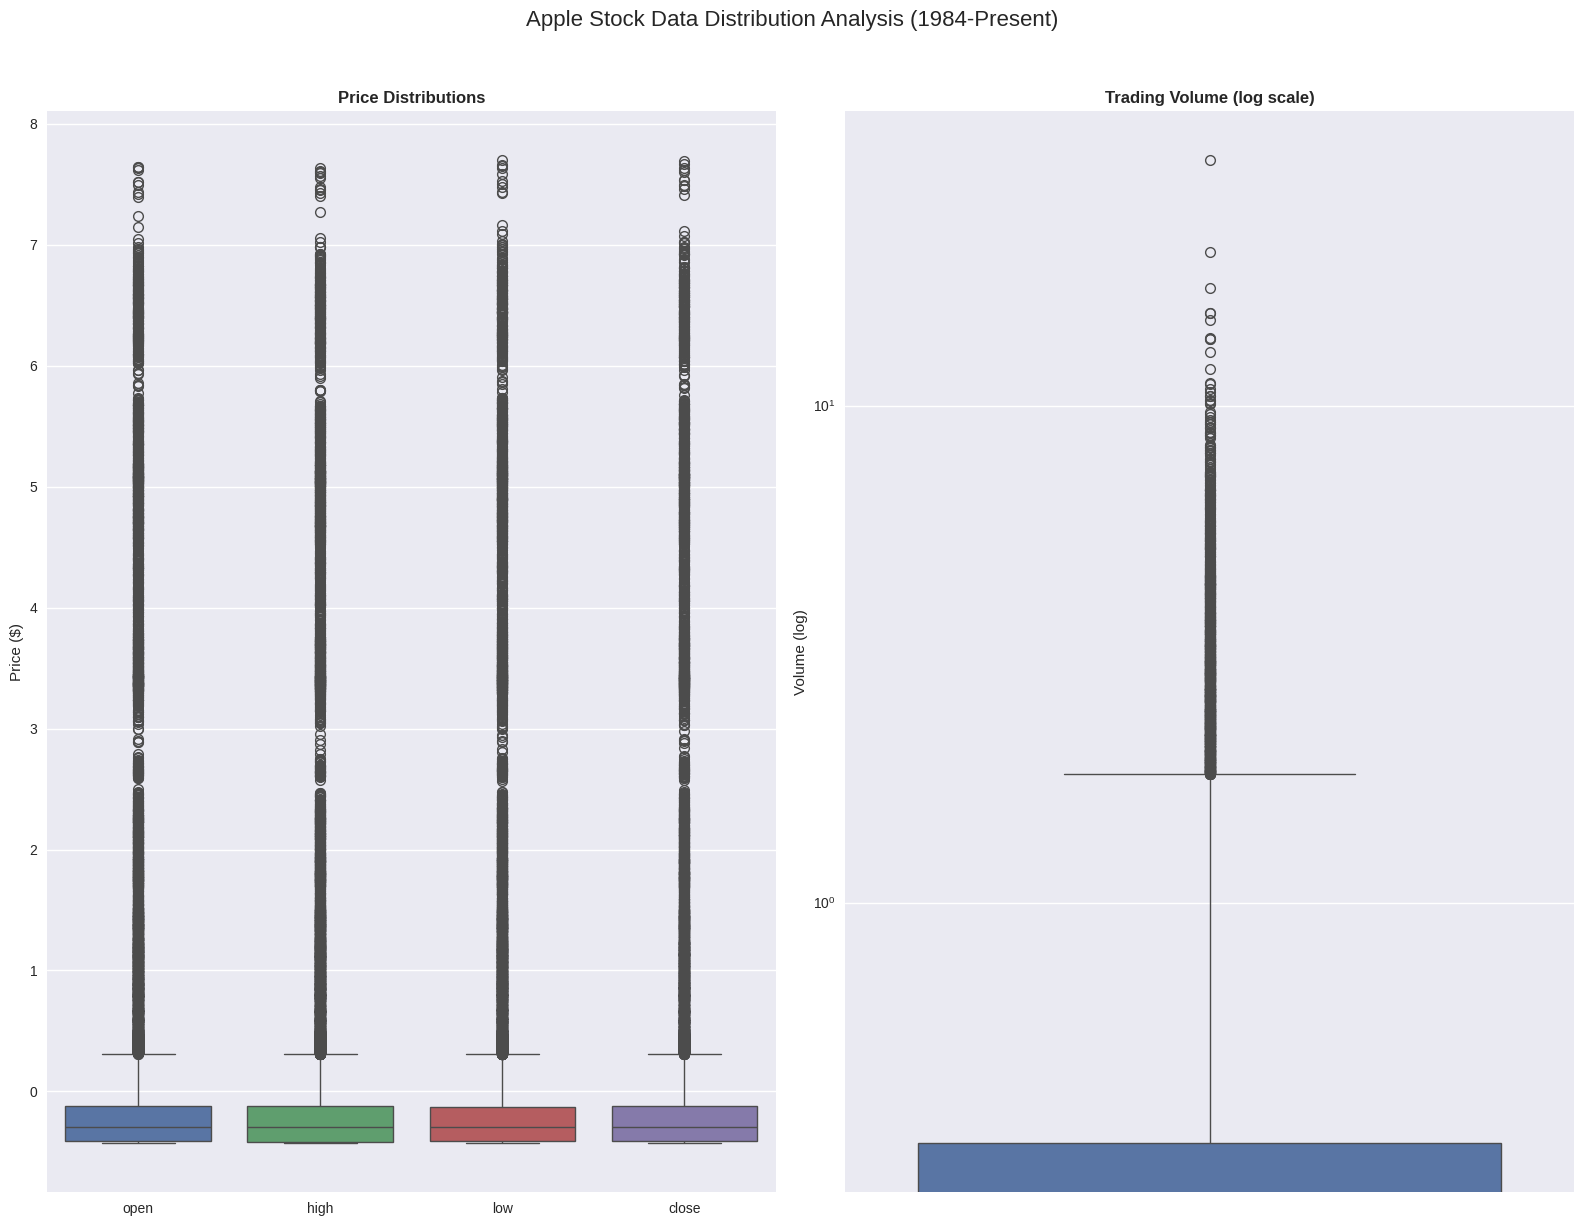

In [65]:
# Set style
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(14, 8))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 12))

# Boxplot 1: Price distributions
sns.boxplot(data=df[['open', 'high', 'low', 'close']], ax=axes[0])
axes[0].set_title('Price Distributions', fontweight='bold')
axes[0].set_ylabel('Price ($)')

# Boxplot 2: Volume distribution (log scale)
sns.boxplot(y=df['volume'], ax=axes[1])
axes[1].set_yscale('log')
axes[1].set_title('Trading Volume (log scale)', fontweight='bold')
axes[1].set_ylabel('Volume (log)')

plt.suptitle('Apple Stock Data Distribution Analysis (1984-Present)', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Detect Outliers based on Companies

In [ ]:
# Count data points per company
company_counts = df['company'].value_counts()

# Plot
plt.figure(figsize=(12, 6))
plt.style.use('seaborn-v0_8')

sns.barplot(x=company_counts.index, y=company_counts.values, palette='Set3')

# Formatting
plt.title('Number of Data Points per Company', fontsize=16)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Records', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Feature Scaling

In [16]:
df.head()

,date,open,high,low,close,volume,company
0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,APPLE
1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,APPLE
2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,APPLE
3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,APPLE
4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,APPLE


In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,45939.0,5.948780e+01,1.395788e+02,0.007910,1.800500e+00,1.802800e+01,4.239000e+01,1.126100e+03
high,45939.0,6.016247e+01,1.408012e+02,0.007910,1.828000e+00,1.825700e+01,4.274500e+01,1.135540e+03
low,45939.0,5.877128e+01,1.384205e+02,-0.181911,1.761100e+00,1.775500e+01,4.155500e+01,1.124060e+03
close,45939.0,5.946708e+01,1.395832e+02,0.007910,1.798500e+00,1.802700e+01,4.233400e+01,1.132880e+03
volume,45939.0,5.211639e+07,6.480794e+07,0.000000,9.075010e+06,3.229536e+07,7.337437e+07,2.069770e+09


In [18]:
from sklearn.preprocessing import StandardScaler

# Scale price features (open, high, low, close)
price_columns = ['open', 'high', 'low', 'close']
scaler = StandardScaler()  # or MinMaxScaler()
df[price_columns] = scaler.fit_transform(df[price_columns])

# Scale volume separately (often has extreme values)
volume_scaler = StandardScaler()
df['volume'] = volume_scaler.fit_transform(df[['volume']])

In [19]:
df.head()

,date,open,high,low,close,volume,company
0,1984-09-07,-0.423163,-0.424244,-0.421565,-0.423001,-0.445882,APPLE
1,1984-09-10,-0.423163,-0.424272,-0.421601,-0.423019,-0.526081,APPLE
2,1984-09-11,-0.423154,-0.424190,-0.421518,-0.422964,-0.148412,APPLE
3,1984-09-12,-0.423126,-0.424226,-0.421583,-0.423056,-0.231310,APPLE
4,1984-09-13,-0.423053,-0.424163,-0.421416,-0.422891,0.088041,APPLE


In [23]:
from sklearn.preprocessing import LabelEncoder

# Encoding the 'company' column
label_encoder = LabelEncoder()

# Apply label encoding to 'company' column
df['company_encoded'] = label_encoder.fit_transform(df['company'])

# Display the first few rows of the dataframe to confirm changes
df.head()

,date,open,high,low,close,volume,company,company_encoded
0,1984-09-07,-0.423163,-0.424244,-0.421565,-0.423001,-0.445882,APPLE,3
1,1984-09-10,-0.423163,-0.424272,-0.421601,-0.423019,-0.526081,APPLE,3
2,1984-09-11,-0.423154,-0.424190,-0.421518,-0.422964,-0.148412,APPLE,3
3,1984-09-12,-0.423126,-0.424226,-0.421583,-0.423056,-0.231310,APPLE,3
4,1984-09-13,-0.423053,-0.424163,-0.421416,-0.422891,0.088041,APPLE,3


In [21]:
df['company_encoded'].unique()

array([3, 2, 0, 8, 4, 1, 5, 6, 7, 9])

In [27]:
df.sort_values(by='company', ascending=True)

,date,open,high,low,close,volume,company,company_encoded
13729,2015-07-24,0.184000,0.179102,0.172510,0.168739,-0.669007,ALIBABA,0
14039,2016-10-14,0.320842,0.316318,0.305296,0.303642,-0.606978,ALIBABA,0
14040,2016-10-17,0.300996,0.307583,0.307030,0.310735,-0.644477,ALIBABA,0
14041,2016-10-18,0.322274,0.318378,0.321767,0.314317,-0.633157,ALIBABA,0
14042,2016-10-19,0.321271,0.317029,0.324224,0.318544,-0.666362,ALIBABA,0
...,...,...,...,...,...,...,...,...
44693,2012-12-03,-0.183395,-0.178711,-0.182571,-0.178011,-0.771992,TESLA,9
44692,2012-11-30,-0.185258,-0.183825,-0.186111,-0.183742,-0.782260,TESLA,9
44691,2012-11-29,-0.186619,-0.185813,-0.187122,-0.184674,-0.787151,TESLA,9
44703,2012-12-17,-0.184255,-0.182262,-0.180765,-0.179587,-0.791448,TESLA,9


In [29]:
mapping = df[['company', 'company_encoded']].drop_duplicates().sort_values(by='company_encoded')
print(mapping)


          company  company_encoded
13517     ALIBABA                0
18893    ALPHABET                1
8364       AMAZON                2
0           APPLE                3
17512    FACEBOOK                4
19809       INTEL                5
31365   MICROSOFT                6
39348      NVIDIA                7
14311  SALESFORCE                8
44081       TESLA                9


In [43]:
df['company'].value_counts()

company
INTEL         11556
APPLE          8364
MICROSOFT      7983
AMAZON         5153
NVIDIA         4733
SALESFORCE     3201
TESLA          1858
FACEBOOK       1381
ALPHABET        916
ALIBABA         794
Name: count, dtype: int64

In [42]:
df['company_encoded'].value_counts()

company_encoded
5    11556
3     8364
6     7983
2     5153
7     4733
8     3201
9     1858
4     1381
1      916
0      794
Name: count, dtype: int64

###  Feature Engineering

#### Create a year and month columns

In [32]:
# Convert the 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Create a 'month_year' column for plotting
df['month_year'] = df['date'].dt.to_period('M').astype(str)

In [33]:
df.head()

,date,open,high,low,close,volume,company,company_encoded,year,month,month_year
0,1984-09-07,-0.423163,-0.424244,-0.421565,-0.423001,-0.445882,APPLE,3,1984,9,1984-09
1,1984-09-10,-0.423163,-0.424272,-0.421601,-0.423019,-0.526081,APPLE,3,1984,9,1984-09
2,1984-09-11,-0.423154,-0.424190,-0.421518,-0.422964,-0.148412,APPLE,3,1984,9,1984-09
3,1984-09-12,-0.423126,-0.424226,-0.421583,-0.423056,-0.231310,APPLE,3,1984,9,1984-09
4,1984-09-13,-0.423053,-0.424163,-0.421416,-0.422891,0.088041,APPLE,3,1984,9,1984-09


In [34]:
new_df = df.groupby(['company', 'month_year'])['close'].mean().reset_index()

In [35]:
new_df

,company,month_year,close
0,ALIBABA,2014-09,0.217403
1,ALIBABA,2014-10,0.223963
2,ALIBABA,2014-11,0.377351
3,ALIBABA,2014-12,0.339675
4,ALIBABA,2015-01,0.293247
...,...,...,...
2195,TESLA,2017-07,1.929565
2196,TESLA,2017-08,2.087720
2197,TESLA,2017-09,2.137715
2198,TESLA,2017-10,2.043286


In [36]:
new_df.dtypes

company        object
month_year     object
close         float64
dtype: object

# Time Series Analysis

In [38]:
# Create lag features (very important for time-series prediction)
# Extract temporal features

new_df['month_year'] = pd.to_datetime(new_df['month_year'])

new_df['month'] = new_df['month_year'].dt.month
new_df['quarter'] = new_df['month_year'].dt.quarter

# Cols for time series analysis
new_df['lag_1'] = new_df.groupby('company')['close'].shift(1)
new_df['lag_2'] = new_df.groupby('company')['close'].shift(2)
new_df['lag_3'] = new_df.groupby('company')['close'].shift(3)

# Add momentum features
new_df['momentum_3m'] = new_df['lag_1'] - new_df['lag_3']
new_df['acceleration'] = (new_df['lag_1'] - new_df['lag_2']) - (new_df['lag_2'] - new_df['lag_3'])

# Rolling statistics
new_df['rolling_mean_6'] = new_df.groupby('company')['close'].rolling(6).mean().values
new_df['rolling_std_6'] = new_df.groupby('company')['close'].rolling(6).std().values

In [39]:
new_df.head()

,company,month_year,close,month,quarter,lag_1,lag_2,lag_3,momentum_3m,acceleration,rolling_mean_6,rolling_std_6
0,ALIBABA,2014-09-01,0.217403,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALIBABA,2014-10-01,0.223963,10,4,0.217403,NaN,NaN,NaN,NaN,NaN,NaN
2,ALIBABA,2014-11-01,0.377351,11,4,0.223963,0.217403,NaN,NaN,NaN,NaN,NaN
3,ALIBABA,2014-12-01,0.339675,12,4,0.377351,0.223963,0.217403,0.159949,0.146827,NaN,NaN
4,ALIBABA,2015-01-01,0.293247,1,1,0.339675,0.377351,0.223963,0.115712,-0.191064,NaN,NaN


In [40]:
new_df

,company,month_year,close,month,quarter,lag_1,lag_2,lag_3,momentum_3m,acceleration,rolling_mean_6,rolling_std_6
0,ALIBABA,2014-09-01,0.217403,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALIBABA,2014-10-01,0.223963,10,4,0.217403,NaN,NaN,NaN,NaN,NaN,NaN
2,ALIBABA,2014-11-01,0.377351,11,4,0.223963,0.217403,NaN,NaN,NaN,NaN,NaN
3,ALIBABA,2014-12-01,0.339675,12,4,0.377351,0.223963,0.217403,0.159949,0.146827,NaN,NaN
4,ALIBABA,2015-01-01,0.293247,1,1,0.339675,0.377351,0.223963,0.115712,-0.191064,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,TESLA,2017-07-01,1.929565,7,3,2.194659,1.841588,1.757324,0.437335,0.268807,1.768307,0.291635
2196,TESLA,2017-08-01,2.087720,8,3,1.929565,2.194659,1.841588,0.087976,-0.618166,1.872385,0.271746
2197,TESLA,2017-09-01,2.137715,9,3,2.087720,1.929565,2.194659,-0.106939,0.423250,1.991429,0.174962
2198,TESLA,2017-10-01,2.043286,10,4,2.137715,2.087720,1.929565,0.208150,-0.108161,2.039089,0.132147


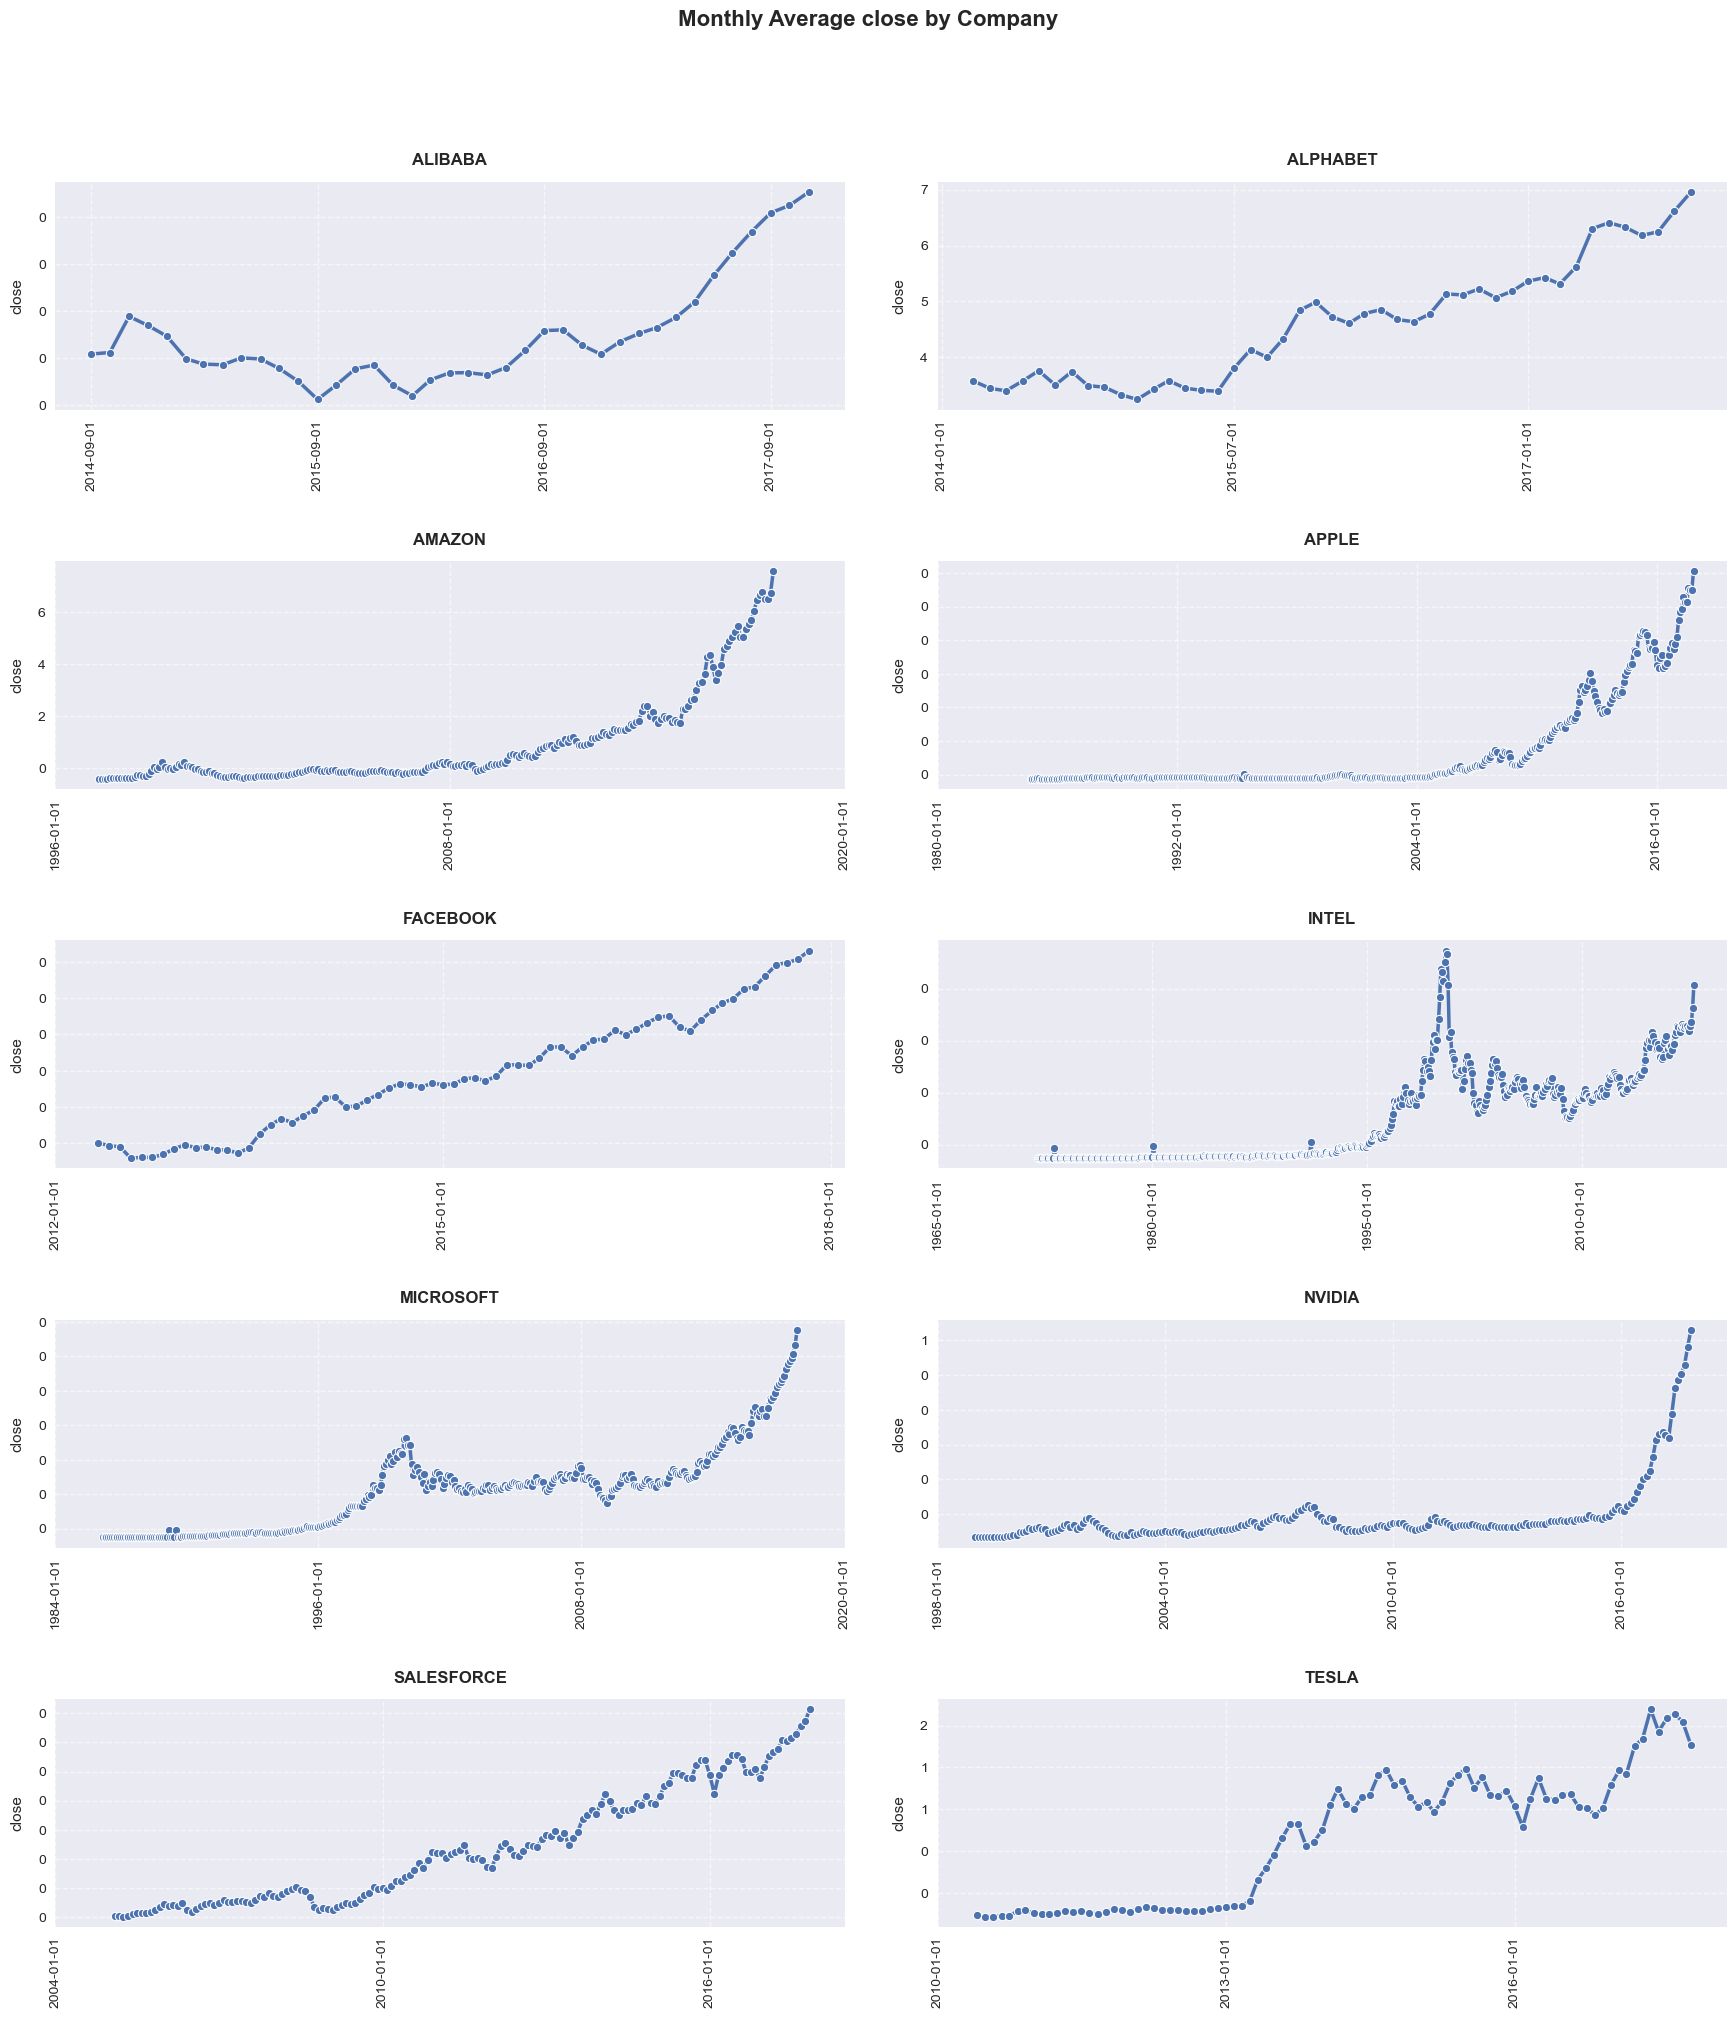

In [42]:

# 2. Create subplots
plt.figure(figsize=(18, 20))
plt.suptitle('Monthly Average close by Company', y=1.02, fontsize=16, fontweight='bold')

# Get unique companies and sort them
companies = sorted(new_df['company'].unique())

# Create one subplot per company
for i, company in enumerate(companies, 1):
    ax = plt.subplot(5, 2, i)  # 5 rows, 2 columns layout
    
    # Filter data for current company
    company_data = new_df[new_df['company'] == company]
    
    # Plot with markers
    sns.lineplot(data=company_data, x='month_year', y='close', 
                 marker='o', markersize=6, linewidth=2.5, ax=ax)
    
    # Customize subplot
    ax.set_title(f'{company}', fontweight='bold', pad=12)
    ax.set_xlabel('')
    ax.set_ylabel('close', labelpad=10)
    
    # Rotate x-axis labels and show only every 3rd label
    ax.set_xticks(ax.get_xticks()[::3])
    ax.tick_params(axis='x', rotation=90)
    
    # Add grid
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Format y-axis with commas
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

plt.tight_layout(pad=3.0)
plt.show()

In [43]:
new_df.isna().sum()

company            0
month_year         0
close              0
month              0
quarter            0
lag_1             10
lag_2             20
lag_3             30
momentum_3m       30
acceleration      30
rolling_mean_6    50
rolling_std_6     50
dtype: int64

In [44]:
df_model = new_df.dropna().copy()

In [46]:
df_model.shape

(2150, 12)

In [47]:
df_model.isna().sum()

company           0
month_year        0
close             0
month             0
quarter           0
lag_1             0
lag_2             0
lag_3             0
momentum_3m       0
acceleration      0
rolling_mean_6    0
rolling_std_6     0
dtype: int64

## Data Splitting 

In [49]:
from sklearn.model_selection import train_test_split

features = [
    'lag_1', 'lag_2', 'lag_3',
    'month', 'quarter',
    'momentum_3m', 'acceleration',
    'rolling_mean_6', 'rolling_std_6'
]

X = df_model[features]
y = df_model['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

## Simple Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [51]:
# Predict
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("MSE: ", mse)
print("MAE: ", mae)

MSE:  0.003193005087566887
MAE:  0.02703865785789957


In [52]:
model

LinearRegression()

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'DecisionTree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'RandomForest': RandomForestRegressor(n_estimators=100, max_depth=6, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42)
}

results = [] # List to store the results

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'MSE': mean_squared_error(y_test, y_pred),
        'R2 Score': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values('MSE'))

              Model       MAE       MSE  R2 Score
0  LinearRegression  0.027039  0.003193  0.988826
1             Ridge  0.027860  0.003472  0.987849
2             Lasso  0.032085  0.004407  0.984576
5           XGBoost  0.031001  0.004416  0.984545
4      RandomForest  0.033804  0.004660  0.983693
3      DecisionTree  0.046027  0.007263  0.974584


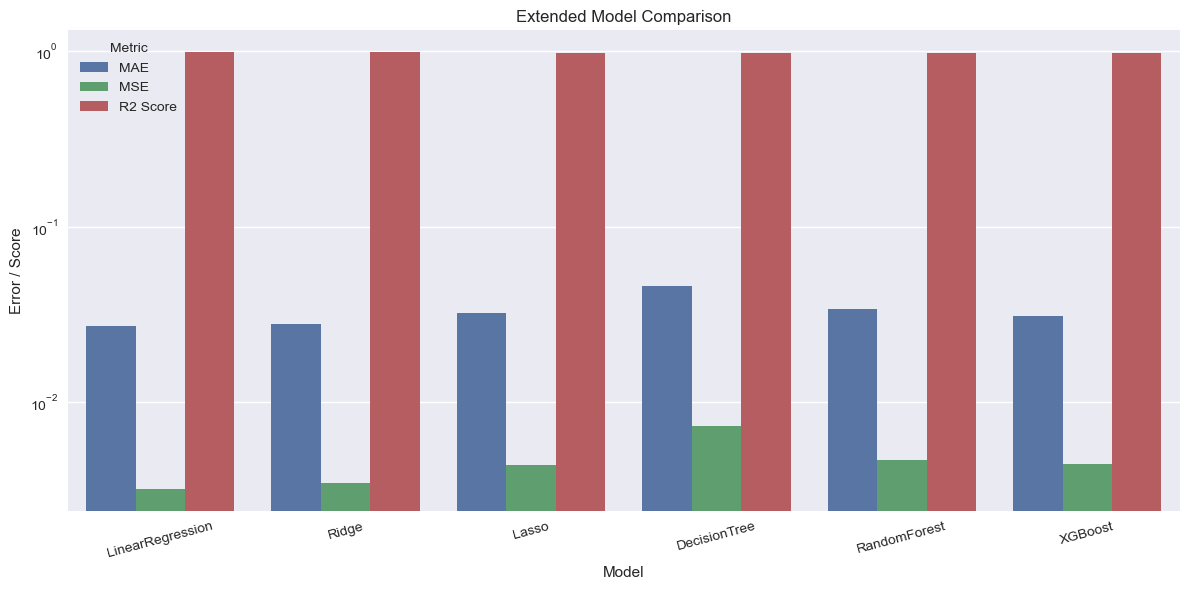

In [59]:

results_df_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

plt.figure(figsize=(12,6))
sns.barplot(data=results_df_melted, x='Model', y='Score', hue='Metric')
plt.title("Extended Model Comparison")
plt.ylabel("Error / Score")
plt.xticks(rotation=15)

plt.yscale('log')

plt.tight_layout()
plt.show()

# Fine-Tunning to find the best hyperparameters

In [60]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [6, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42),
                           param_grid,
                           cv=3, # Cross-Validation
                           scoring='neg_mean_squared_error',
                           verbose=2,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': 8, 'min_samples_split': 2, 'n_estimators': 200}


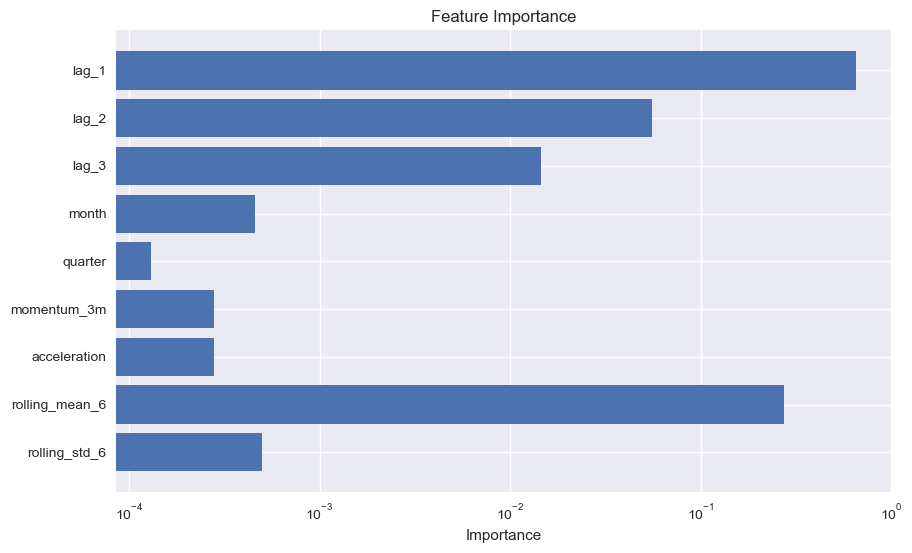

In [61]:
importances = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title('Feature Importance')

plt.xscale('log')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [64]:
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_split=10,
    n_estimators=200,
    random_state=42 # Reproducibility
)

best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred_best_rf)
rmse = mean_squared_error(y_test, y_pred_best_rf) ** 0.5
r2 = r2_score(y_test, y_pred_best_rf)

print(f"Tuned Random Forest - MAE: {mae:.5f}, RMSE: {rmse:.5f}, R²: {r2:.5f}")

Tuned Random Forest - MAE: 0.03356, RMSE: 0.07021, R²: 0.98275


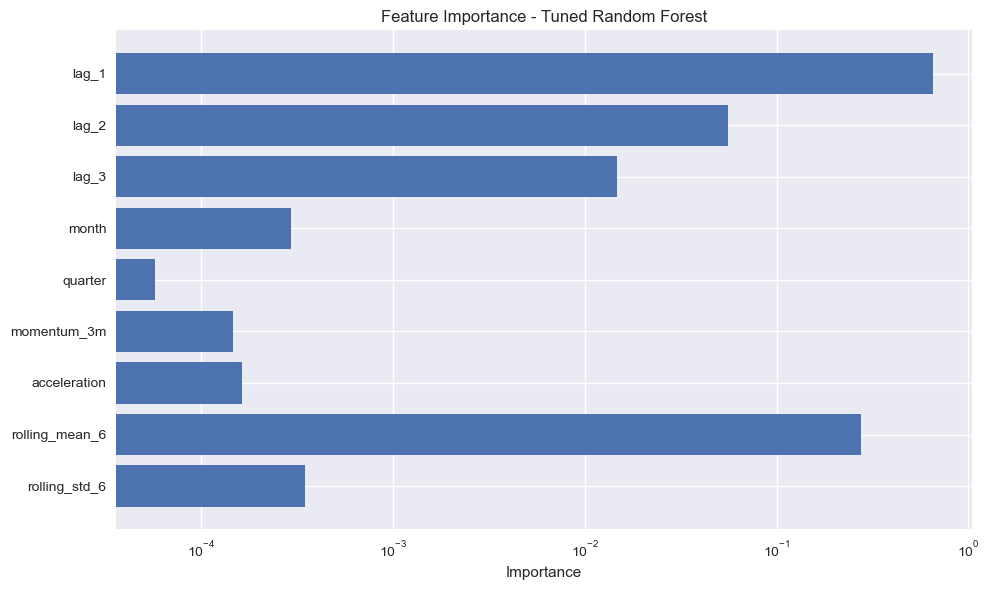

In [65]:
importances = best_rf.feature_importances_
feature_names = X.columns

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_names, importances)
plt.title('Feature Importance - Tuned Random Forest')
plt.xlabel('Importance')

plt.xscale('log')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [66]:
## Save the model

import joblib

# Save the model to a file
joblib.dump(best_rf, 'Model.pkl')

['Model.pkl']

## Make prediction

In [167]:
new_df['month_year'].max()

Timestamp('2017-11-01 00:00:00')

In [68]:
# LATEST DATE: Timestamp('2017-11-01 00:00:00')

#🔮 You can predict for December 2017 using this data.


from pandas.tseries.offsets import DateOffset

latest_month = new_df['month_year'].max()

next_month = latest_month + DateOffset(months=1)
next_month_num = next_month.month
next_quarter = (next_month.month - 1) // 3 + 1

# 2. Generate features for the next month (per company)
next_month_rows = []

for company, group in new_df.groupby('company'):
    group = group.sort_values('month_year')
    
    if len(group) < 6:
        continue  # Not enough data
    
    last_6 = group.iloc[-6:]
    last_3 = group.iloc[-3:]
    
    lag_1 = last_6['close'].iloc[-1]
    lag_2 = last_6['close'].iloc[-2]
    lag_3 = last_6['close'].iloc[-3]
    
    momentum_3m = lag_1 - lag_3
    acceleration = (lag_1 - lag_2) - (lag_2 - lag_3)
    rolling_mean_6 = last_6['close'].mean()
    rolling_std_6 = last_6['close'].std()
    
    next_month_rows.append({
        'company': company,
        'lag_1': lag_1,
        'lag_2': lag_2,
        'lag_3': lag_3,
        'month': next_month_num,
        'quarter': next_quarter,
        'momentum_3m': momentum_3m,
        'acceleration': acceleration,
        'rolling_mean_6': rolling_mean_6,
        'rolling_std_6': rolling_std_6
    })

# 3. Create DataFrame and predict
future_df = pd.DataFrame(next_month_rows)

In [69]:
future_df

,company,lag_1,lag_2,lag_3,month,quarter,momentum_3m,acceleration,rolling_mean_6,rolling_std_6
0,ALIBABA,0.906417,0.849719,0.818681,12,4,0.087735,0.025660,0.752358,0.133137
1,ALPHABET,6.954729,6.612870,6.246062,12,4,0.708667,-0.024949,6.454879,0.287190
2,AMAZON,7.580644,6.743361,6.516079,12,4,1.064565,0.610002,6.807081,0.395193
3,APPLE,0.808920,0.700556,0.699063,12,4,0.109857,0.106872,0.694997,0.067072
4,FACEBOOK,0.861953,0.815578,0.796117,12,4,0.065836,0.026915,0.774512,0.070423
5,INTEL,-0.093442,-0.136893,-0.165347,12,4,0.071904,0.014998,-0.154729,0.034057
6,MICROSOFT,0.176316,0.132342,0.106586,12,4,0.069730,0.018218,0.112220,0.036787
7,NVIDIA,1.073156,0.953835,0.822181,12,4,0.250975,-0.012333,0.829761,0.156877
8,SALESFORCE,0.313914,0.272510,0.255072,12,4,0.058842,0.023966,0.248748,0.040430
9,TESLA,1.764033,2.043286,2.137715,12,4,-0.373683,-0.184825,2.026163,0.156819


In [70]:
X_future = future_df.drop(columns=['company'])

In [71]:
X_future

,lag_1,lag_2,lag_3,month,quarter,momentum_3m,acceleration,rolling_mean_6,rolling_std_6
0,0.906417,0.849719,0.818681,12,4,0.087735,0.025660,0.752358,0.133137
1,6.954729,6.612870,6.246062,12,4,0.708667,-0.024949,6.454879,0.287190
2,7.580644,6.743361,6.516079,12,4,1.064565,0.610002,6.807081,0.395193
3,0.808920,0.700556,0.699063,12,4,0.109857,0.106872,0.694997,0.067072
4,0.861953,0.815578,0.796117,12,4,0.065836,0.026915,0.774512,0.070423
5,-0.093442,-0.136893,-0.165347,12,4,0.071904,0.014998,-0.154729,0.034057
6,0.176316,0.132342,0.106586,12,4,0.069730,0.018218,0.112220,0.036787
7,1.073156,0.953835,0.822181,12,4,0.250975,-0.012333,0.829761,0.156877
8,0.313914,0.272510,0.255072,12,4,0.058842,0.023966,0.248748,0.040430
9,1.764033,2.043286,2.137715,12,4,-0.373683,-0.184825,2.026163,0.156819


In [72]:
import joblib

# Load the model
model = joblib.load('Model.pkl')

In [73]:
future_df['predicted_close'] = model.predict(X_future)



print(f"\nPredictions for {next_month.strftime('%B %Y')}:")
print(future_df[['company', 'predicted_close']])


Predictions for December 2017:
      company  predicted_close
0     ALIBABA         0.901385
1    ALPHABET         6.766158
2      AMAZON         6.867196
3       APPLE         0.817551
4    FACEBOOK         0.859684
5       INTEL        -0.099344
6   MICROSOFT         0.176878
7      NVIDIA         1.044159
8  SALESFORCE         0.320152
9       TESLA         1.933463


In [77]:
new_df

,company,month_year,volume,month,quarter,lag_1,lag_2,lag_3,momentum_3m,acceleration,rolling_mean_6,rolling_std_6
0,ALIBABA,2014-09-01,0.171944,9,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ALIBABA,2014-10-01,-0.507750,10,4,0.171944,NaN,NaN,NaN,NaN,NaN,NaN
2,ALIBABA,2014-11-01,-0.176560,11,4,-0.507750,0.171944,NaN,NaN,NaN,NaN,NaN
3,ALIBABA,2014-12-01,-0.555021,12,4,-0.176560,-0.507750,0.171944,-0.348503,1.010884,NaN,NaN
4,ALIBABA,2015-01-01,-0.511620,1,1,-0.555021,-0.176560,-0.507750,-0.047271,-0.709652,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2195,TESLA,2017-07-01,-0.664389,7,3,-0.674317,-0.700676,-0.710345,0.036029,0.016689,-0.698796,0.025462
2196,TESLA,2017-08-01,-0.713145,8,3,-0.664389,-0.674317,-0.700676,0.036287,-0.016431,-0.699401,0.025808
2197,TESLA,2017-09-01,-0.718299,9,3,-0.713145,-0.664389,-0.674317,-0.038829,-0.058685,-0.696862,0.022288
2198,TESLA,2017-10-01,-0.718034,10,4,-0.718299,-0.713145,-0.664389,-0.053910,0.043603,-0.698143,0.023411


# Simple Classification: Up vs Down

In [75]:
# Create a new binary target: 1 if close increased from previous month, 0 otherwise
new_df['target'] = (new_df['close'] > new_df['lag_1']).astype(int)

# Check
print(new_df[['company', 'month_year', 'close', 'lag_1', 'target']].head(10))

   company month_year     close     lag_1  target
0  ALIBABA 2014-09-01  0.217403       NaN       0
1  ALIBABA 2014-10-01  0.223963  0.217403       1
2  ALIBABA 2014-11-01  0.377351  0.223963       1
3  ALIBABA 2014-12-01  0.339675  0.377351       0
4  ALIBABA 2015-01-01  0.293247  0.339675       0
5  ALIBABA 2015-02-01  0.197174  0.293247       0
6  ALIBABA 2015-03-01  0.174585  0.197174       0
7  ALIBABA 2015-04-01  0.171643  0.174585       0
8  ALIBABA 2015-05-01  0.201122  0.171643       1
9  ALIBABA 2015-06-01  0.196367  0.201122       0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


classification_data = new_df.dropna()


X = classification_data.drop(columns=['company', 'month_year', 'close', 'target'])
y = classification_data['target']

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Train a classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# 5. Predict and evaluate
y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.6186
              precision    recall  f1-score   support

           0       0.52      0.38      0.44       169
           1       0.66      0.77      0.71       261

    accuracy                           0.62       430
   macro avg       0.59      0.58      0.57       430
weighted avg       0.60      0.62      0.60       430



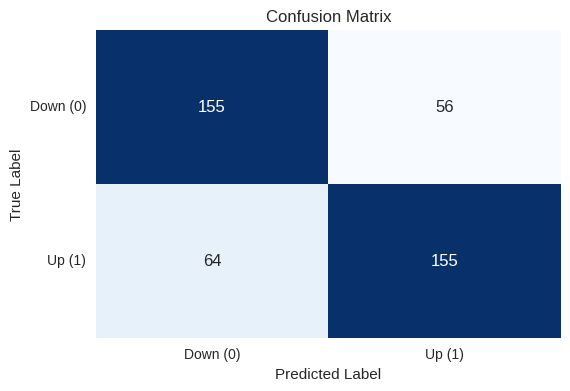

In [187]:
# 2. Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# 3. Plot
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(ticks=[0.5, 1.5], labels=['Down (0)', 'Up (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Down (0)', 'Up (1)'], rotation=0)
plt.show()

Logistic Regression Accuracy: 0.6140
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       169
           1       0.61      1.00      0.76       261

    accuracy                           0.61       430
   macro avg       0.81      0.51      0.40       430
weighted avg       0.76      0.61      0.47       430

------------------------------------------------------------
SVM Accuracy: 0.6070
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       169
           1       0.61      1.00      0.76       261

    accuracy                           0.61       430
   macro avg       0.30      0.50      0.38       430
weighted avg       0.37      0.61      0.46       430

------------------------------------------------------------
KNN Accuracy: 0.5372
              precision    recall  f1-score   support

           0       0.39      0.31      0.35       169
           1       0.61      0.68   

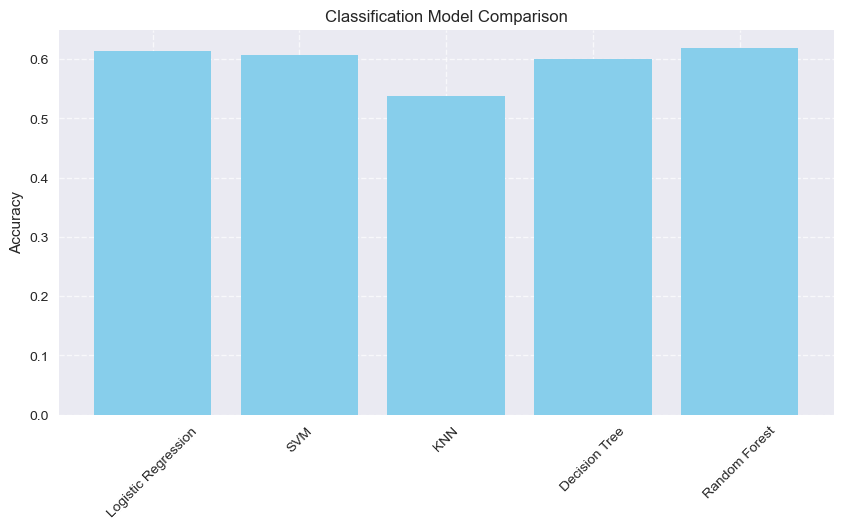

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# 1. Prepare data
classification_data = new_df.dropna()
X = classification_data.drop(columns=['company', 'month_year', 'close', 'target'])
y = classification_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# 3. Train, evaluate and store results
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))
    print('-'*60)

# 4. Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy')
plt.title('Classification Model Comparison')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
